<a href="https://colab.research.google.com/github/icyda17/Data_Science_Bootcamp/blob/master/Loan_or_No_Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Library

In [389]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import Perceptron

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix,f1_score #for model evaluation

pd.options.mode.chained_assignment = None

#Read Data

In [390]:
df  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv" )

In [391]:
df.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         491 non-null    int64  
 1   Loan_ID            491 non-null    object 
 2   Gender             481 non-null    object 
 3   Married            490 non-null    object 
 4   Dependents         482 non-null    object 
 5   Education          491 non-null    object 
 6   Self_Employed      462 non-null    object 
 7   ApplicantIncome    491 non-null    int64  
 8   CoapplicantIncome  491 non-null    float64
 9   LoanAmount         475 non-null    float64
 10  Loan_Amount_Term   478 non-null    float64
 11  Credit_History     448 non-null    float64
 12  Property_Area      491 non-null    object 
 13  Loan_Status        491 non-null    int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 53.8+ KB


###Unique Values

In [393]:
for column in df.drop(['Unnamed: 0','Loan_ID','ApplicantIncome','CoapplicantIncome'], axis = 1).columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")

Gender : ['Female' 'Male' nan]
Married : ['No' 'Yes' nan]
Dependents : ['0' '3+' '2' '1' nan]
Education : ['Graduate' 'Not Graduate']
Self_Employed : ['No' 'Yes' nan]
LoanAmount : [115. 130. 110.  96. 230.  87. 265. 161. 304. 126. 101. 152. 144. 187.
 267. 105. 108. 188. 349. 143.  67. 150.  73. 280.  95. 112. 132. 173.
 175. 123.  98.  80. 107. 286.  50. 151. 380. 207. 158. 209. 128. 312.
 135. 210. 170. 120. 182.  88.  66. 103. 700. 186. 102.  55. 155.  30.
 200. 113. 153. 308. 122. 106. 160. 124.  90. 133. 148. 136.  25. 157.
  62.  60. 234. 205. 125. 100. 116.  40. 258.  nan 131.  75. 260. 201.
 140. 118. 111. 180.  70.  74. 154. 104. 185. 495. 172.  99.  36. 127.
 600.  44.  86.  81. 145. 121.  89. 320. 162. 296. 259. 436. 137.  56.
 253.  85. 275. 480. 129. 176.  45. 184.  42.  47. 228.  84. 191.  83.
 214.  46.  26. 500.  53.  58. 650. 139.  35. 208. 156. 190. 134. 142.
 165.  97.  72. 300. 350. 376. 250.  71. 167. 255. 216. 330.  63. 146.
 168. 246. 225. 149.  61. 141.  76. 138

###Range Value

In [394]:
df.describe()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,491.000000,491.000000,491.000000,475.000000,478.000000,448.000000,491.000000
mean,245.000000,5401.189409,1589.730998,145.014737,341.297071,0.848214,0.698574
std,141.883755,6419.427177,2919.320624,86.310534,66.964051,0.359214,0.459345
min,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000
25%,122.500000,2923.500000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,245.000000,3865.000000,1229.000000,126.000000,360.000000,1.000000,1.000000
75%,367.500000,5705.500000,2251.500000,162.000000,360.000000,1.000000,1.000000
max,490.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


Here we can observe that the maximum value of ApplicantIncome and CoapplicantIncome is much higher than the 75% of the data of ApplicantIncome and CoapplicantIncome respectively.

###Dtypes

In [395]:
df.dtypes

Unnamed: 0             int64
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [396]:
df = df.astype({'Credit_History': 'object', 'Loan_Status': 'object'})

#Missing values

In [397]:
df.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender               10
Married               1
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [398]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)

In [399]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

In [400]:
df.dropna(inplace=True)

In [401]:
df.shape

(432, 14)

In [402]:
df = df.astype({'Credit_History': 'object'})

#Multivariate Analysis

In [403]:
df_cat = df.select_dtypes(include = ['object'])
df_num = df.select_dtypes(include=['int64', 'float64'])

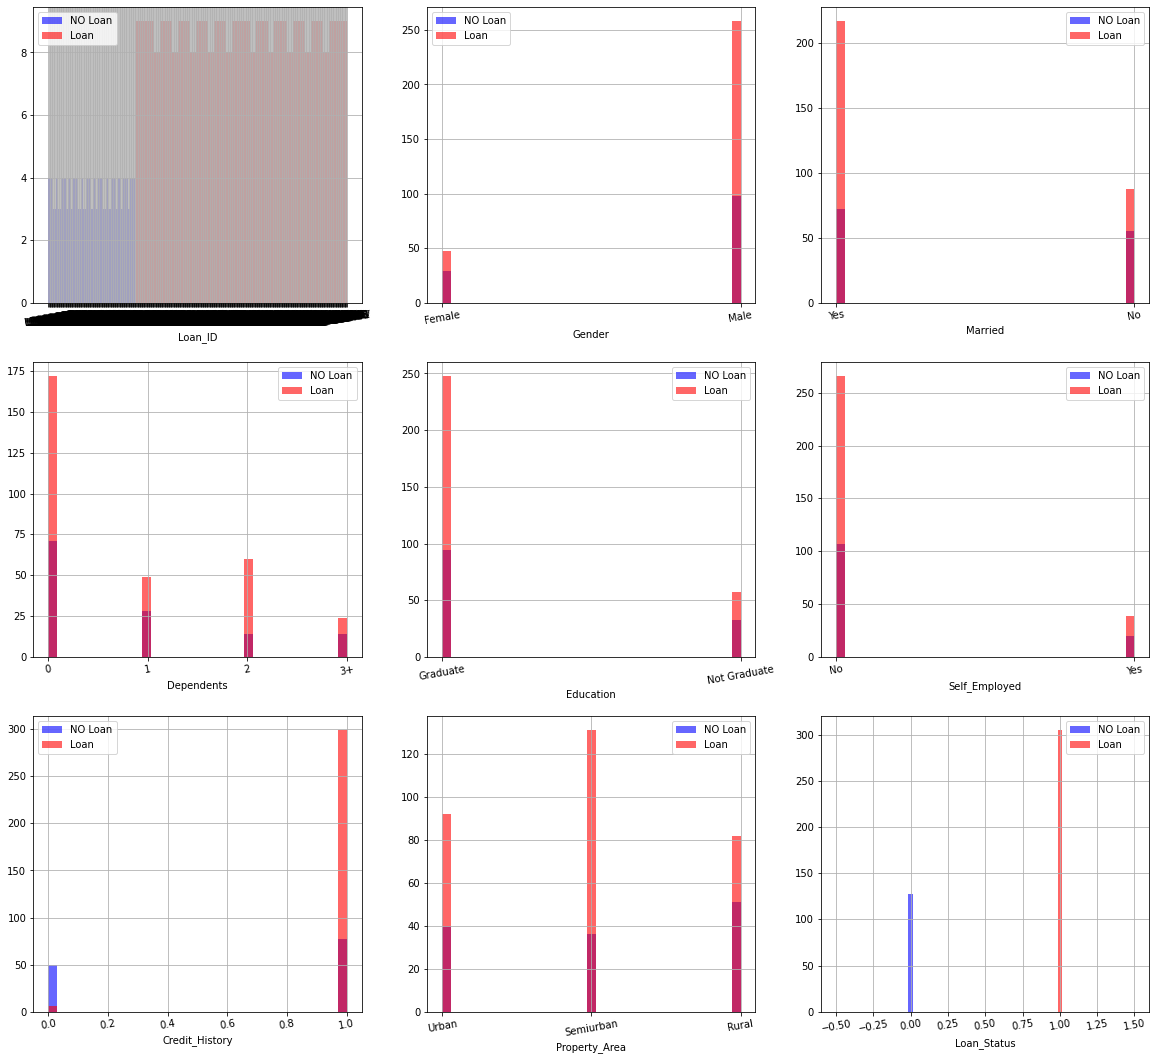

In [404]:
plt.figure(figsize=(20, 25))

for i, column in enumerate(df_cat, 1):
    plt.subplot(4, 3, i)
    df[df["Loan_Status"] == 0][column].hist(bins=35, color='blue', label='NO Loan', alpha=0.6)
    df[df["Loan_Status"] == 1][column].hist(bins=35, color='red', label='Loan', alpha=0.6)
    plt.legend()
    plt.xlabel(column)
    plt.xticks(rotation = 10)

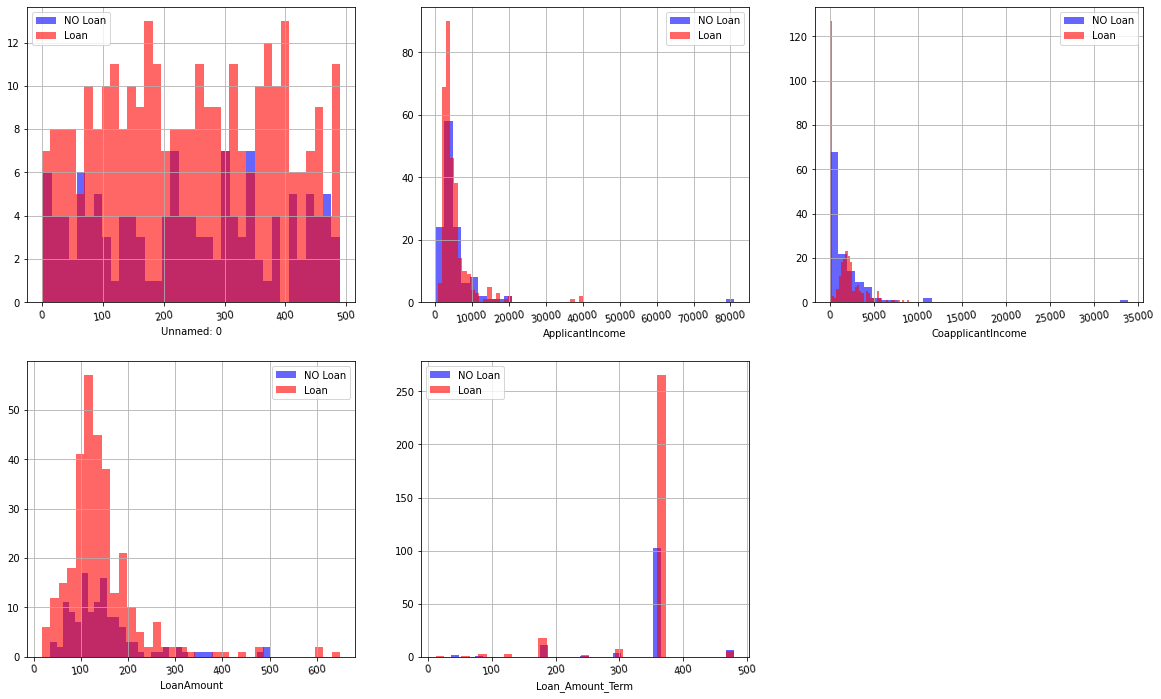

In [405]:
plt.figure(figsize=(20, 25))
for i, column in enumerate(df_num, 1):
    plt.subplot(4, 3, i)
    df[df["Loan_Status"] == 0][column].hist(bins=35, color='blue', label='NO Loan', alpha=0.6)
    df[df["Loan_Status"] == 1][column].hist(bins=35, color='red', label='Loan', alpha=0.6)
    plt.legend()
    plt.xlabel(column)
    plt.xticks(rotation = 10)

In [406]:
df = df.astype({'Loan_Status': 'int64'})

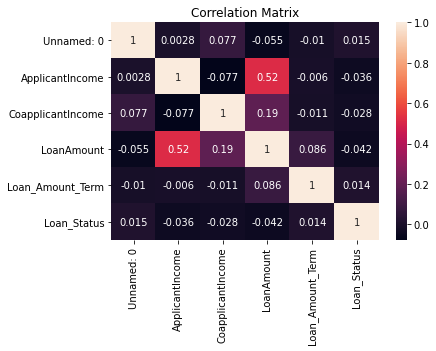

In [407]:
plt.title('Correlation Matrix')
sns.heatmap(df.corr(),annot=True)

In [408]:
df.drop(['Unnamed: 0','Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis = 1, inplace=True)

In [409]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Female,No,0,Graduate,No,1,Semiurban,1
1,Male,Yes,3+,Not Graduate,Yes,1,Rural,1
2,Female,Yes,0,Graduate,No,1,Urban,0
4,Male,Yes,2,Graduate,No,1,Semiurban,1
5,Male,Yes,0,Not Graduate,Yes,1,Semiurban,0


In [410]:
df = pd.get_dummies(df, drop_first=True)

In [411]:
df.head()

,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0,0,0,1,1,0
1,1,1,1,0,0,1,1,1,1,0,0
2,0,0,1,0,0,0,0,0,1,0,1
4,1,1,1,0,1,0,0,0,1,1,0
5,0,1,1,0,0,0,1,1,1,1,0


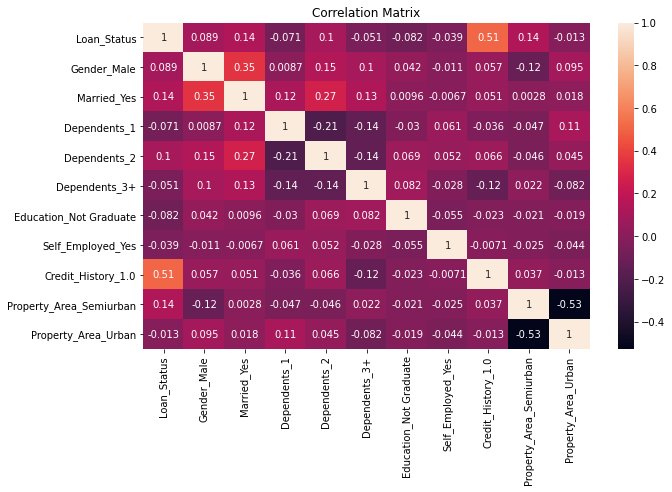

In [412]:
plt.figure(figsize=(10,6))
plt.title('Correlation Matrix')
sns.heatmap(df.corr(),annot=True)

Loan status is least correlated with self_employed_yes,education_not_graduate,dependents, property_area_Urban

In [413]:
df.drop(['Dependents_1','Dependents_3+','Education_Not Graduate','Self_Employed_Yes','Property_Area_Urban'], axis = 1, inplace=True)

In [414]:
df.head()

,Loan_Status,Gender_Male,Married_Yes,Dependents_2,Credit_History_1.0,Property_Area_Semiurban
0,1,0,0,0,1,1
1,1,1,1,0,1,0
2,0,0,1,0,1,0
4,1,1,1,1,1,1
5,0,1,1,0,1,1


#Model

In [415]:
X = df.drop(['Loan_Status'], axis =1)
y = df['Loan_Status']

In [416]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=29, stratify = y)

In [417]:
def print_score(model, X_train, y_train, X_test, y_test, train= True):
  if train:
    pred = model.predict(X_train)
    report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
    print("Train Result:\n================================================")
    print(f"F1 Score: {f1_score(y_train, pred) * 100:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{report}")
    print("_______________________________________________")
    print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
  elif train == False:
    pred = model.predict(X_test)
    clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
    print("Test Result:\n================================================")        
    print(f"F1 Score: {f1_score(y_test, pred) * 100:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("_______________________________________________")
    print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [451]:
#Logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [419]:
test_score = f1_score(y_test, lr.predict(X_test)) * 100
train_score = f1_score(y_train, lr.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic regression", train_score, test_score]], 
                          columns=['Model', 'Training F1 Score %', 'Testing F1 Score %'])
results_df

,Model,Training F1 Score %,Testing F1 Score %
0,Logistic regression,87.5,89.051095


In [420]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [421]:
test_score = f1_score(y_test, knc.predict(X_test)) * 100
train_score = f1_score(y_train, knc.predict(X_train)) * 100

results_df2 = pd.DataFrame(data=[["K-Neighbors Classifier", train_score, test_score]], 
                          columns=['Model', 'Training F1 Score %', 'Testing F1 Score %'])
results_df = results_df.append(results_df2,ignore_index=True)
results_df

,Model,Training F1 Score %,Testing F1 Score %
0,Logistic regression,87.500000,89.051095
1,K-Neighbors Classifier,85.490196,79.674797


In [422]:
rfc = RandomForestClassifier(max_depth=5)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [423]:
test_score = f1_score(y_test, rfc.predict(X_test)) * 100
train_score = f1_score(y_train, rfc.predict(X_train)) * 100

results_df3 = pd.DataFrame(data=[["Random Forest Classification", train_score, test_score]], 
                          columns=['Model', 'Training F1 Score %', 'Testing F1 Score %'])
results_df = results_df.append(results_df3,ignore_index=True)
results_df

,Model,Training F1 Score %,Testing F1 Score %
0,Logistic regression,87.500000,89.051095
1,K-Neighbors Classifier,85.490196,79.674797
2,Random Forest Classification,87.777778,87.407407


In [424]:
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [425]:
test_score = f1_score(y_test, svc.predict(X_test)) * 100
train_score = f1_score(y_train, svc.predict(X_train)) * 100

results_df4 = pd.DataFrame(data=[["Support Vector Classifier", train_score, test_score]], 
                          columns=['Model', 'Training F1 Score %', 'Testing F1 Score %'])
results_df = results_df.append(results_df4,ignore_index=True)
results_df

,Model,Training F1 Score %,Testing F1 Score %
0,Logistic regression,87.500000,89.051095
1,K-Neighbors Classifier,85.490196,79.674797
2,Random Forest Classification,87.777778,87.407407
3,Support Vector Classifier,87.777778,87.407407


In [426]:
tree = DecisionTreeClassifier(random_state = 2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')

In [427]:
test_score = f1_score(y_test, tree.predict(X_test)) * 100
train_score = f1_score(y_train, tree.predict(X_train)) * 100

results_df5 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training F1 Score %', 'Testing F1 Score %'])
results_df = results_df.append(results_df5,ignore_index=True)
results_df

,Model,Training F1 Score %,Testing F1 Score %
0,Logistic regression,87.500000,89.051095
1,K-Neighbors Classifier,85.490196,79.674797
2,Random Forest Classification,87.777778,87.407407
3,Support Vector Classifier,87.777778,87.407407
4,Decision Tree Classifier,87.732342,87.407407


In [428]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [429]:
test_score = f1_score(y_test, xgb.predict(X_test)) * 100
train_score = f1_score(y_train, xgb.predict(X_train)) * 100

results_df6 = pd.DataFrame(data=[["XGBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training F1 Score %', 'Testing F1 Score %'])
results_df = results_df.append(results_df6,ignore_index=True)
results_df

,Model,Training F1 Score %,Testing F1 Score %
0,Logistic regression,87.500000,89.051095
1,K-Neighbors Classifier,85.490196,79.674797
2,Random Forest Classification,87.777778,87.407407
3,Support Vector Classifier,87.777778,87.407407
4,Decision Tree Classifier,87.732342,87.407407
5,XGBoost Classifier,87.732342,87.407407


In [430]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [431]:
test_score = f1_score(y_test, sgd.predict(X_test)) * 100
train_score = f1_score(y_train, sgd.predict(X_train)) * 100

results_df7 = pd.DataFrame(data=[["Stochastic Gradient Descent", train_score, test_score]], 
                          columns=['Model', 'Training F1 Score %', 'Testing F1 Score %'])
results_df = results_df.append(results_df7,ignore_index=True)
results_df

,Model,Training F1 Score %,Testing F1 Score %
0,Logistic regression,87.500000,89.051095
1,K-Neighbors Classifier,85.490196,79.674797
2,Random Forest Classification,87.777778,87.407407
3,Support Vector Classifier,87.777778,87.407407
4,Decision Tree Classifier,87.732342,87.407407
5,XGBoost Classifier,87.732342,87.407407
6,Stochastic Gradient Descent,85.214008,81.600000


#Tuning model

In [432]:
params = {'C': np.logspace(-4, 4, 20),
          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

lr = LogisticRegression()

lr_cv = GridSearchCV(lr, params, scoring='f1', n_jobs=-1, verbose = 1, cv=5, iid=True)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best Params: {lr_cv.best_params_}")

lr2 = LogisticRegression(**best_params)
lr2.fit(X_train, y_train)

print_score(lr2, X_train, y_train, X_test, y_test, train=True)
print_score(lr2, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 464 tasks      | elapsed:    3.5s


Best Params: {'C': 0.23357214690901212, 'solver': 'newton-cg'}
Train Result:
F1 Score: 87.50%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.866667    0.793333  0.802899    0.830000      0.814802
recall       0.386139    0.975410  0.802899    0.680774      0.802899
f1-score     0.534247    0.875000  0.802899    0.704623      0.775243
support    101.000000  244.000000  0.802899  345.000000    345.000000
_______________________________________________
Confusion Matrix: 
 [[ 39  62]
 [  6 238]]

Test Result:
F1 Score: 89.05%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   1.000000   0.802632  0.827586   0.901316      0.861615
recall      0.423077   1.000000  0.827586   0.711538      0.827586
f1-score    0.594595   0.890511  0.827586   0.742553      0.802076
support    26.000000  61

[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [433]:
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(f1_score(y_train, model.predict(X_train)))
#     test_score.append(accuracy_score(y_test, model.predict(X_test)))

In [434]:
knc2 = KNeighborsClassifier(n_neighbors=27)
knc2.fit(X_train, y_train)

print_score(knc2, X_train, y_train, X_test, y_test, train=True)
print_score(knc2, X_train, y_train, X_test, y_test, train=False)

Train Result:
F1 Score: 86.49%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.882353    0.771704  0.782609    0.827029      0.804097
recall       0.297030    0.983607  0.782609    0.640318      0.782609
f1-score     0.444444    0.864865  0.782609    0.654655      0.741785
support    101.000000  244.000000  0.782609  345.000000    345.000000
_______________________________________________
Confusion Matrix: 
 [[ 30  71]
 [  4 240]]

Test Result:
F1 Score: 85.92%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   1.000000   0.753086  0.770115   0.876543      0.826877
recall      0.230769   1.000000  0.770115   0.615385      0.770115
f1-score    0.375000   0.859155  0.770115   0.617077      0.714465
support    26.000000  61.000000  0.770115  87.000000     87.000000
____________________

#Test

In [442]:
test = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_test.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001116,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban
1,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban
2,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural
3,LP002284,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural
4,LP002328,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural


In [443]:
test.isnull().sum()

Loan_ID              0
Gender               3
Married              2
Dependents           6
Education            0
Self_Employed        3
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           6
Loan_Amount_Term     1
Credit_History       7
Property_Area        0
dtype: int64

In [444]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace= True)
test['Married'].fillna(test['Married'].mode()[0], inplace= True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace= True)

In [445]:
test.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis = 1, inplace=True)

In [446]:
test = test.astype({'Credit_History': 'object'})

In [447]:
test = pd.get_dummies(test, drop_first=True)
test.drop(['Dependents_1','Dependents_3+','Education_Not Graduate','Self_Employed_Yes','Property_Area_Urban'], axis = 1, inplace=True)

In [452]:
pred = lr.predict(test)

In [455]:
index = range(0,len(pred))
prediction_RF = pd.DataFrame(data=pred,index=index, columns=["prediction"])
prediction_RF.to_csv('pred.csv',index=False)